# Multiples Regressionsmodell


In [1]:
%pip install geopandas

Note: you may need to restart the kernel to use updated packages.


## Cholera outbreak

![John Snow](https://upload.wikimedia.org/wikipedia/commons/c/cc/John_Snow.jpg) [John Snow](https://en.wikipedia.org/wiki/John_Snow) was an English physicist famous for locating the source of the London cholera epidemic of 1854. At the time of the outbreak the germ theory of disease transmission was not developed yet and cholera was blamed on bad air. John Snow investigated the cases and concluded that the source of the outbreak is a water pump located on Broad Street. He was able to convince the city council to close the pump but people initially resisted his theory of water born transmission, because it seemed to be socially unacceptable.

![Cholera cases](http://blog.rtwilson.com/wp-content/uploads/2012/01/SnowMap_Points.png)

![Broad street pump](https://lookup.london/wp-content/uploads/2018/08/Photo-11-08-2018-13-44-18.jpg.webp)

## World War II

During World war 2 combat aviation played a crucial role but also suffered heavy casualties. British bomber command for example reports a death rate of about 46 percent over the entire war. In order to reduce the number of planes that were being shot down during mission, the military collected data on the damage taken from returning bombers in order to decide where to place armour on the planes.

![Flight](https://images.squarespace-cdn.com/content/v1/5497331ae4b0148a6141bd47/1563476799483-JXTY82K6EJ2Y6THNIN53/ke17ZwdGBToddI8pDm48kAY9gT9wm-2Z9KnmFRfe2dVZw-zPPgdn4jUwVcJE1ZvWQUxwkmyExglNqGp0IvTJZUJFbgE-7XRK3dMEBRBhUpzdMdQQVVUpiXVl6rYD3wsGGtpDQQshX7-5HE1V8UScgaHj4j2hNsP6urc280cwWcU/7.jpg)

![Flac damage on a bomber plane](https://www.old.bombercommandmuseum.ca/photos/p_airgunners1b.jpg)

![Bullet holes locations (histogram)](https://alearningadayblog.files.wordpress.com/2018/06/bombers.jpeg)

![](https://riskwerk.files.wordpress.com/2016/11/abraham-wald1.png)


In [2]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
from urllib.request import urlopen
import json

# Read the data
crime = pd.read_csv("https://raw.githubusercontent.com/febse/data/main/econ/crime.csv", delimiter="\t")

# Drop the 'I' column
crime = crime.drop(columns=['I'])

# Variables description:
# 'C': number of crimes per 100,000 inhabitants
# 'HS': share of high school graduates
# 'U': share of persons living in urban areas

# Code for illustration purposes only
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)


In [3]:
us_counties = gpd.GeoDataFrame.from_features(counties)
us_counties["NAME"] = us_counties["NAME"].str.upper()

In [4]:
crime

,County,C,HS,U
0,ALACHUA,104,82.7,73.2
1,BAKER,20,64.1,21.5
2,BAY,64,74.7,85.0
3,BRADFORD,50,65.0,23.2
4,BREVARD,64,82.3,91.9
...,...,...,...,...
62,UNION,6,67.7,0.0
63,VOLUSIA,62,75.4,83.9
64,WAKULLA,29,71.6,0.0
65,WALTON,18,66.5,20.9


In [6]:
# Define county name compatibility
county_name_compat = {
  "WASHINGTON": "WASHING",
  "SANTA ROSA": "SANTAR",
  "SUWANNEE": "SUWANEE",
  "PALM BEACH": "PALMB",
  "OKEECHOBEE": "OKEECH",
  "INDIAN RIVER": "INDIANR",
  "HILLSBOROUGH": "HILLSBOR.",
  "MIAMI-DADE": "DADE"
}

# Load US counties data
# Replace 'us_counties.geojson' with your actual US counties GeoJSON file

florida_counties = us_counties[us_counties["STATE"] == "12"].copy()
florida_counties["NAME"] = florida_counties["NAME"].replace(county_name_compat)
florida_counties["NAME"] = florida_counties["NAME"].replace("[\s.]", "", regex=True)
crime["County"] = crime["County"].replace("[\s.]", "", regex=True)
# Filter for Florida counties
florida_crime = pd.merge(florida_counties, crime, right_on="County", left_on="NAME", how='right')

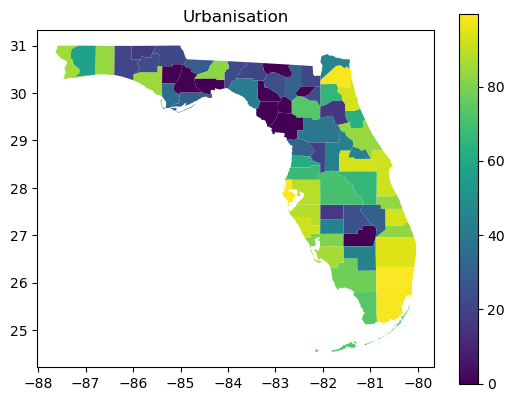

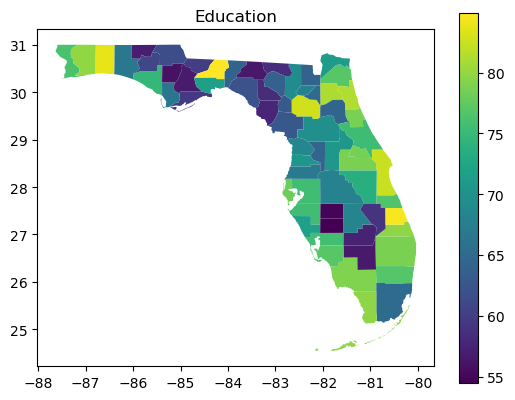

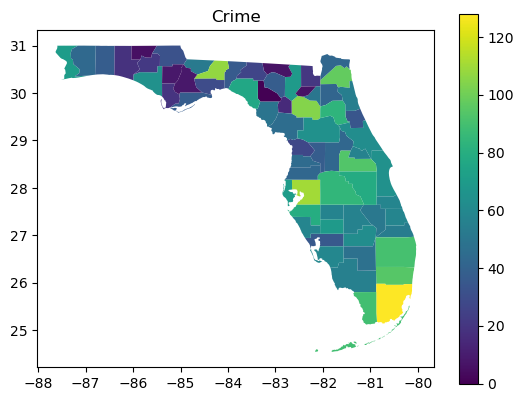

In [7]:
import matplotlib.pyplot as plt

# Plot urbanisation
florida_crime.plot(column='U', legend=True)
plt.title('Urbanisation')
plt.show()

# Plot high school graduates
florida_crime.plot(column='HS', legend=True)
plt.title("Education")
plt.show()

florida_crime.plot(column='C', legend=True)
plt.title("Crime")
plt.show()



# Modell 1: Kriminalität und Bildung

$$
\text{C}_i \sim N(\mu_i, \sigma^2) \\
\mu_i = \beta_0 + \beta_1 \text{HS}_i \\
$$


<Axes: xlabel='HS', ylabel='C'>

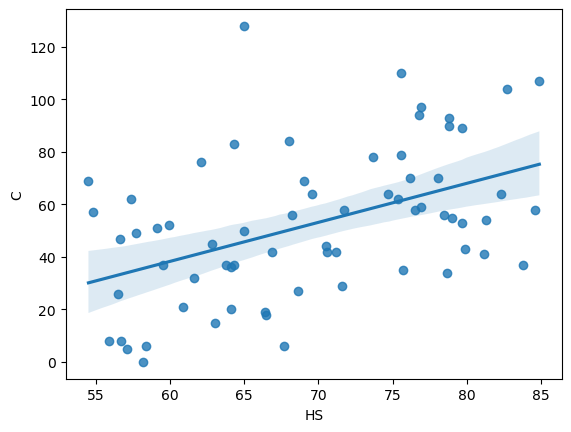

In [8]:
sns.regplot(x='HS', y='C', data=florida_crime)

In [ ]:
from statsmodels.formula.api import ols

# Schätzen Sie das Modell

model1 = ols('C ~ HS', data=florida_crime).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      C   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     18.12
Date:                Tue, 07 May 2024   Prob (F-statistic):           6.81e-05
Time:                        16:33:34   Log-Likelihood:                -310.05
No. Observations:                  67   AIC:                             624.1
Df Residuals:                      65   BIC:                             628.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -50.8569     24.451     -2.080      0.041     -99.688      -2.026
HS             1.4860      0.349      4.257      0.000       0.789       2.183
==============================================================================
Omnibus:                        4.854   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.181
Skew:                           0.601   Prob(JB):                        0.124
Kurtosis:                       3.225   Cond. No.                         558.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Modell 2: Kriminalität und Urbanisierung

$$
\text{C}_i \sim N(\mu_i, \sigma^2) \\
\mu_i = \beta_0 + \beta_1 \text{U}_i \\
$$


In [ ]:
# Stellen Sie die Daten und die Regressionsgerade in einem Streudiagramm dar


In [ ]:
# Schätzen Sie das Modell


# Modell 3: Bildung und Urbanisierung

$$
\text{HS}_i \sim N(\mu_i, \sigma^2) \\
\mu_i = \beta_0 + \beta_1 \text{U}_i
$$


In [ ]:
# Stellen Sie die Daten und die Regressionsgerade in einem Streudiagramm dar


In [ ]:
# Schätzen Sie das Modell


# Graphische Darstellung der Daten


/home/amarov/anaconda3/envs/econ2024/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/amarov/anaconda3/envs/econ2024/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/amarov/anaconda3/envs/econ2024/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


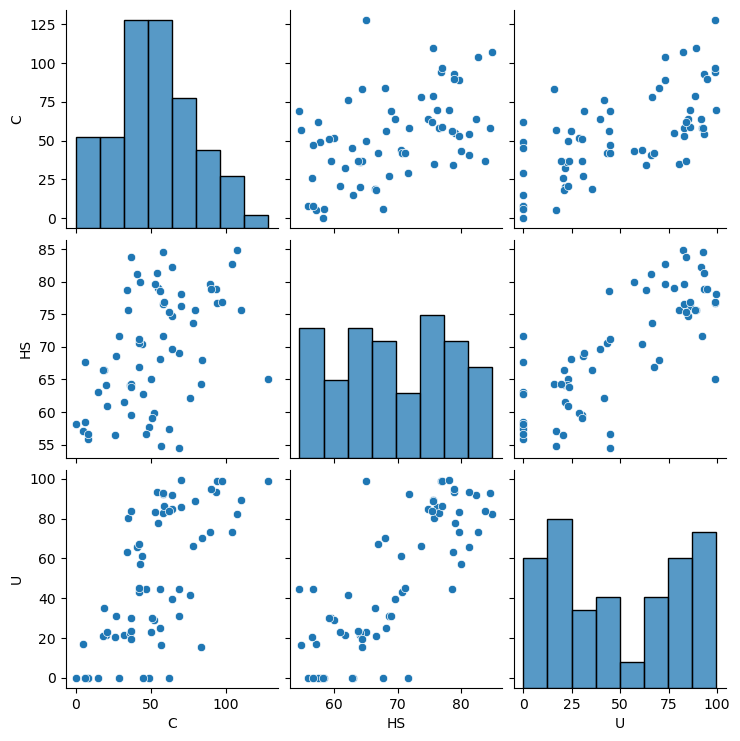

In [ ]:

# Assuming 'crime' is the pandas DataFrame containing the data
sns.pairplot(crime)


## Modell 4: Kriminalität, Bildung und Urbanisierung

$$
\text{C}_i \sim N(\mu_i, \sigma^2) \\
\mu_i = \beta_0 + \beta_1 \text{HS}_i + \beta_2 \text{U}_i
$$

In [126]:
# Schätzen Sie das Modell


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      C   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     28.54
Date:                Wed, 08 May 2024   Prob (F-statistic):           1.38e-09
Time:                        14:48:15   Log-Likelihood:                -296.93
No. Observations:                  67   AIC:                             599.9
Df Residuals:                      64   BIC:                             606.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.1181     28.365      2.084      0.041       2.452     115.784
HS            -0.5834      0.472     -1.235      0.221      -1.527       0.360
U              0.6825      0.123      5.539      0.000       0.436       0.929
==============================================================================
Omnibus:                        4.652   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                4.252
Skew:                           0.543   Prob(JB):                        0.119
Kurtosis:                       2.414   Cond. No.                         997.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Schätzen Sie die erwartete Kriminalitätsrate für eine County mit einer Urbanisierung von 0% und einer High School Abschlussrate 0%.
- Schätzen Sie die erwartete Kriminalitätsrate für eine County mit einem mittleren Urbanisierungsgrad und einer mittleren High School Abschlussrate

0    59.16763
dtype: float64

In [123]:
# m.get_prediction({'HS': 0.5, 'U': 0.5}).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,59.16763,28.175229,2.881139,115.454121,-10.813727,129.148987


In [118]:
import numpy as np

def normalize(x):
    return (x - np.mean(x)) / np.std(x)

ols("C ~ normalize(HS) + normalize(U)", data=florida_crime).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      C   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     28.54
Date:                Tue, 07 May 2024   Prob (F-statistic):           1.38e-09
Time:                        17:22:29   Log-Likelihood:                -296.93
No. Observations:                  67   AIC:                             599.9
Df Residuals:                      64   BIC:                             606.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        52.4030      2.543     20.607      0.000      47.323      57.483
normalize(HS)    -5.1293      4.154     -1.235      0.221     -13.428       3.169
normalize(U)     23.0102      4.154      5.539      0.000      14.712      31.309
==============================================================================
Omnibus:                        4.652   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                4.252
Skew:                           0.543   Prob(JB):                        0.119
Kurtosis:                       2.414   Cond. No.                         2.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      C   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     28.54
Date:                Wed, 08 May 2024   Prob (F-statistic):           1.38e-09
Time:                        14:50:25   Log-Likelihood:                -296.93
No. Observations:                  67   AIC:                             599.9
Df Residuals:                      64   BIC:                             606.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               27.3240      5.052      5.409      0.000      17.232      37.416
normalize_to_max(HS)   -17.7347     14.363     -1.235      0.221     -46.428      10.958
normalize_to_max(U)     67.9771     12.272      5.539      0.000      43.461      92.493
==============================================================================
Omnibus:                        4.652   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                4.252
Skew:                           0.543   Prob(JB):                        0.119
Kurtosis:                       2.414   Cond. No.                         8.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""